# The Fisher-Wright Model

The notebook explores the Fisher-Wright (or Wright-Fisher) Model describing evolution in a sexual population.  Sexual reproduction plays a subtle role of decoupling traits at different parts of the genome.  This allows us to consider each trait separately.  We will model a realistic genome at the end of this tutorial to demonstrate that this assumption is a good model of reality.

We assume we have a population of fixed size $P$ that evolves from one generation to the next.  We assume that there are two types of individuals: those with trait $A$ and those with trait $B$.  We assume $B$ is fitter (produce more offspring).  Let $n(t)$ be the number of individuals of type $B$ at generation $t$.  At each generation the following happens:
1. Individuals produce a large number of seeds.  For each seed the $A$ type produces the $B$ type produces $1+s$ seeds so that the proportion of seeds produced by type $B$ is
$$p_s(t) = \frac{(1+s)\,n(t)}{P-n(t)+(1+s)\,n(t)} = \frac{(1+s)\,n(t)}{P+s\,n(t)}$$
2. The seeds however contain mutations
- $A\rightarrow B$ with probability $u$
- $B\rightarrow A$ with probability $v$

so the proportion of seeds of type $B$ are
$$p_{sm} = (1-v)\,p_s + u \,(1-p_s)$$
3. From the seeds a new generation of size $P$ is produced.  The probability that the number of type $B$ individuals, $n(t+1)$, is equal to $n'$ is given by the binomial distribution
$$\mathbb{P}\!\left(\strut n(t+1)=n'\right) = \binom{P}{n'} p_{sm}^{n'} \, (1-p_{sm})^{p-n'}$$

The peculiar thing is that sexual reproduction doesn't seem to play a role.  However, when we have a large number of traits without sexual reproduction the traits are linked together (something known as linkage).  Sexual reproduction causes sufficient mixing that we can treat the traits separately.  We have assumed are individuals are haploids.  For diploids the model is slightly more complicated, although the major difference is the population size doubles.

## Task 1: Simulating Fisher-Wright

Write a program to simulate the Fisher-Wright model of evolution.  (To make it easy you can just copy the code below).

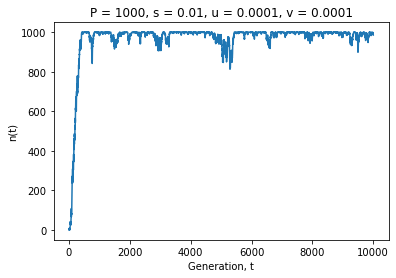

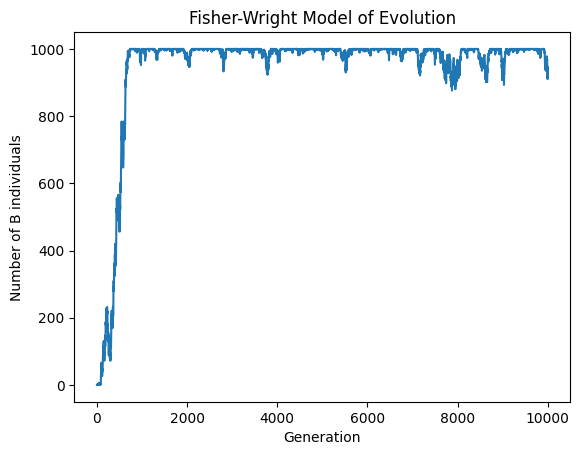

In [90]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import comb

class FisherWright:
    def __init__(self, population_size, s, u, v):
        self.population_size = population_size
        self.s = s
        self.u = u
        self.v = v

    def next_generation(self, n):
        ps = (1 + self.s) * n / (self.population_size + self.s * n)
        psm = (1 - self.v) * ps + self.u * (1 - ps)

        next_n = np.random.binomial(self.population_size, psm)
        return next_n

    def simulate(self, initial_n, generations):
        n_values = [initial_n]
        for _ in range(generations):
            next_n = self.next_generation(n_values[-1])
            n_values.append(next_n)
        return n_values


population_size = 1000
s = 0.01
u = 0.0001
v = 0.0001
generations = 10000
initial_n = 0

model = FisherWright(population_size, s, u, v)
n_values = model.simulate(initial_n, generations)


plt.plot(n_values)
plt.xlabel('Generation')
plt.ylabel('Number of B individuals')
plt.title('Fisher-Wright Model of Evolution')
plt.show()

### Questions

Under what conditions does trait $B$ take over the population1. 
2. Define the take-over time as the first time when $n(t) = 0.95 P$
    - Plot a graph of how the take-over time depends on the selection strength $s$ (assume $P=10000$ and $u=v=0.0001$)
    - Plot a graph of how the take-over time depends on the mutation rate $u=v=m$ (assuming $P=10000$ and $s=0.01$)
    - Plot a graph of how the take-over time depends on the population size $P$ (assuming $s=0.01$ and $u=v=0.0001$)

Trait B takes over the population if there is a balance in the forward/backward mutation rates u and v such that v is below a certain amount and u is large enough meaning the forward7 mutations outweigh the backward mutatoins, provided the population is a sufficiently large size.

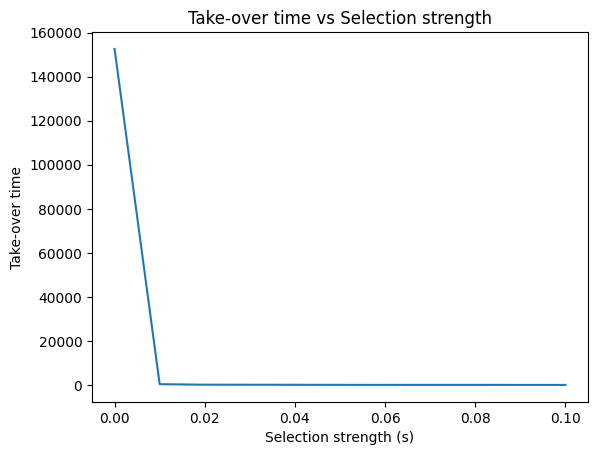

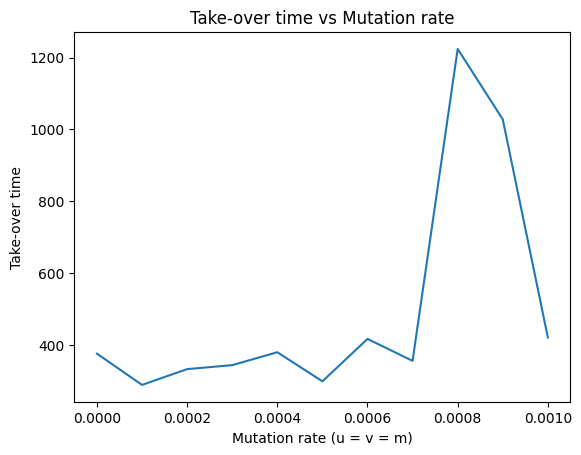

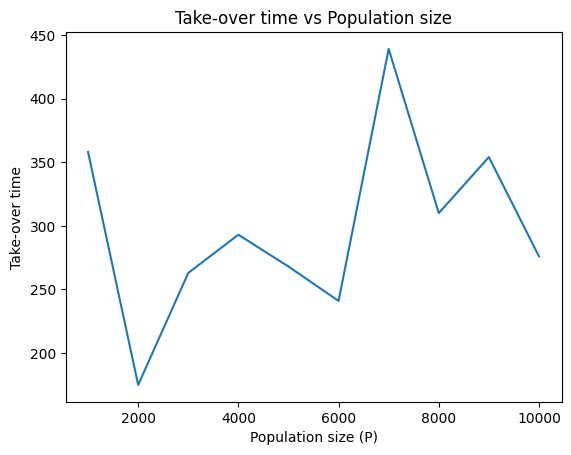

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def takeover_time(model, initial_n, threshold):
    t = 0
    n = initial_n
    while n < threshold:
        n = model.next_generation(n)
        t += 1
    return t

def main():
    # Parameters
    P = 10000
    threshold = 0.95 * P
    u = v = 0.0001
    s_values = np.linspace(0, 0.1, 11)
    m_values = np.linspace(0, 0.001, 11)
    P_values = np.arange(1000, 11000, 1000)

    # Plot take-over time vs selection strength s
    initial_n = int(P / 2)
    takeover_times_s = [takeover_time(FisherWright(P, s, u, v), initial_n, threshold) for s in s_values]
    plt.plot(s_values, takeover_times_s)
    plt.xlabel('Selection strength (s)')
    plt.ylabel('Take-over time')
    plt.title('Take-over time vs Selection strength')
    plt.show()

    # Plot take-over time vs mutation rate m
    initial_n = int(P / 2)
    takeover_times_m = [takeover_time(FisherWright(P, 0.01, m, m), initial_n, threshold) for m in m_values]
    plt.plot(m_values, takeover_times_m)
    plt.xlabel('Mutation rate (u = v = m)')
    plt.ylabel('Take-over time')
    plt.title('Take-over time vs Mutation rate')
    plt.show()

    # Plot take-over time vs population size P
    takeover_times_P = []
    for P_val in P_values:
        initial_n = int(P_val / 2)
        threshold = 0.95 * P_val
        takeover_time_P = takeover_time(FisherWright(P_val, 0.01, u, v), initial_n, threshold)
        takeover_times_P.append(takeover_time_P)

    plt.plot(P_values, takeover_times_P)
    plt.xlabel('Population size (P)')
    plt.ylabel('Take-over time')
    plt.title('Take-over time vs Population size')
    plt.show()

if __name__ == "__main__":
    main()


## Task 2: Multiple Runs

The results from the previous question will vary from run to run.  To get a better understanding we can average over many runs.  Write a program to do this.

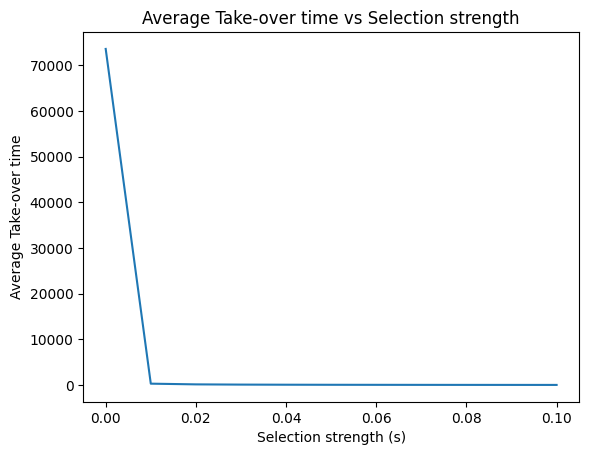

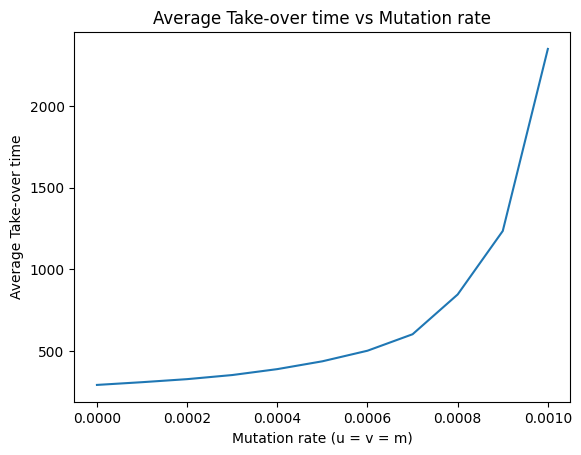

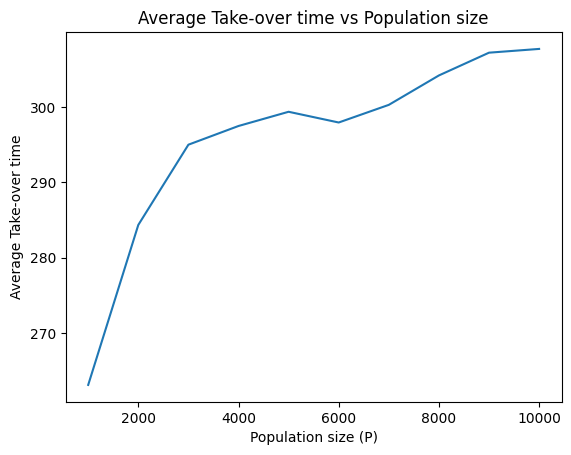

In [109]:
def main():
    # Parameters
    P = 10000
    threshold = 0.95 * P
    u = v = 0.0001
    s_values = np.linspace(0, 0.1, 11)
    m_values = np.linspace(0, 0.001, 11)
    P_values = np.arange(1000, 11000, 1000)
    num_runs = 1000

    # Calculate average take-over time vs selection strength s
    initial_n = int(P / 2)
    takeover_times_s = np.zeros(len(s_values))
    for _ in range(num_runs):
        takeover_times_s += np.array([takeover_time(FisherWright(P, s, u, v), initial_n, threshold) for s in s_values])
    takeover_times_s /= num_runs

    # Calculate average take-over time vs mutation rate m
    initial_n = int(P / 2)
    takeover_times_m = np.zeros(len(m_values))
    for _ in range(num_runs):
        takeover_times_m += np.array([takeover_time(FisherWright(P, 0.01, m, m), initial_n, threshold) for m in m_values])
    takeover_times_m /= num_runs

    # Calculate average take-over time vs population size P
    takeover_times_P = np.zeros(len(P_values))
    for i, P_val in enumerate(P_values):
        initial_n = int(P_val / 2)
        threshold = 0.95 * P_val
        total_takeover_time_P = 0
        for _ in range(num_runs):
            total_takeover_time_P += takeover_time(FisherWright(P_val, 0.01, u, v), initial_n, threshold)
        takeover_times_P[i] = total_takeover_time_P / num_runs

    # Plot average take-over time vs selection strength s
    plt.plot(s_values, takeover_times_s)
    plt.xlabel('Selection strength (s)')
    plt.ylabel('Average Take-over time')
    plt.title('Average Take-over time vs Selection strength')
    plt.show()

    # Plot average take-over time vs mutation rate m
    plt.plot(m_values, takeover_times_m)
    plt.xlabel('Mutation rate (u = v = m)')
    plt.ylabel('Average Take-over time')
    plt.title('Average Take-over time vs Mutation rate')
    plt.show()

    # Plot average take-over time vs population size P
    plt.plot(P_values, takeover_times_P)
    plt.xlabel('Population size (P)')
    plt.ylabel('Average Take-over time')
    plt.title('Average Take-over time vs Population size')
    plt.show()

if __name__ == "__main__":
    main()



## Task 3: Markov Model

We can make a Markov model that describes the probability, $p(t,n)$, of there being $n$ individuals in generation $t$.  We can represent this probability as a vector $\mathbf{p}(t)$ where the $n^{th}$ elements represents $p(t,n)$.  We can build a transition matrix $\mathbf{W}$ where the element $W_{n',n}$ is the probability of the number of individuals with trait $B$ changing from $n$ to $n'$ in one geneation.  In this case we can compute the evolution using 
$$ \mathbf{p}(t+1) = \mathbf{W} \, \mathbf{p}(t). $$
Write a matrix to compute $\mathbf{W}$ for a population of size $P$ a selection strength $s$, and mutation rates $u$ and $v$.

### Questions

1. Show that columns all sum to 1 (A population with $n$ individuals of type $B$ will evolve to a population of $n'$ individuals of type $B$ for some $n'$)
    - Check for different parameters
    
2. Starting from $p(t,0)=1$ compute the evolution of $\mathbf{p}(t)$ and show a graph of the mean number of individuals.  Compare this to multiEvolution.
    - Show that as we use more copies in multiEvolution we get closer to the Markov result
    
3. Plot $\mathbf{p}(100)$ and compare this with a histogram from multiEvolution.
    - Show that this is true for both short and long times.

In [98]:
import numpy as np

def transition_matrix(P, s, u, v):
    W = np.zeros((P+1, P+1))
    
    for n in range(P+1):
        ps = (1 + s) * n / (P + s * n)
        psm = (1 - v) * ps + u * (1 - ps)
        
        for n_prime in range(P+1):
            W[n_prime, n] = np.random.binomial(P, psm, size=1)[0]
            
    # Normalize the columns
    W /= W.sum(axis=0)
    
    return W

P = 10000
s = 0.01
u = v = 0.0001

W = transition_matrix(P, s, u, v)
# print("Transition matrix W:\n", W)

# Check if columns sum to 1
print("Columns sum to 1:", np.allclose(W.sum(axis=0), 1))

P = 20000
s = 0.01
u= v = 0.001
W = transition_matrix(P, s, u, v)
# print("Transition matrix W:\n", W)
print("Columns sum to 1:", np.allclose(W.sum(axis=0), 1))


Columns sum to 1: True
Columns sum to 1: True


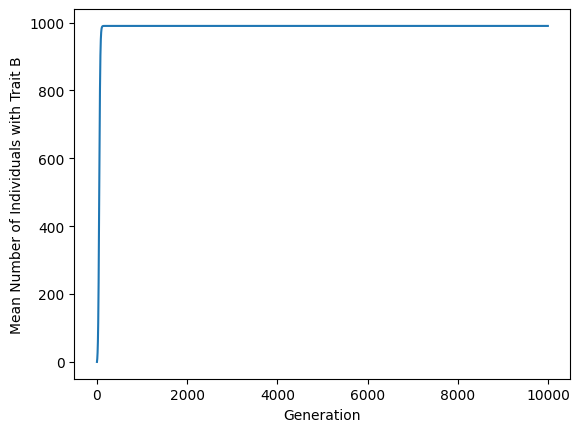

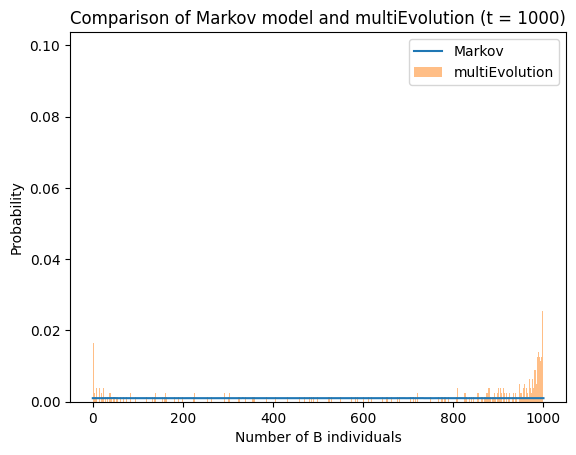

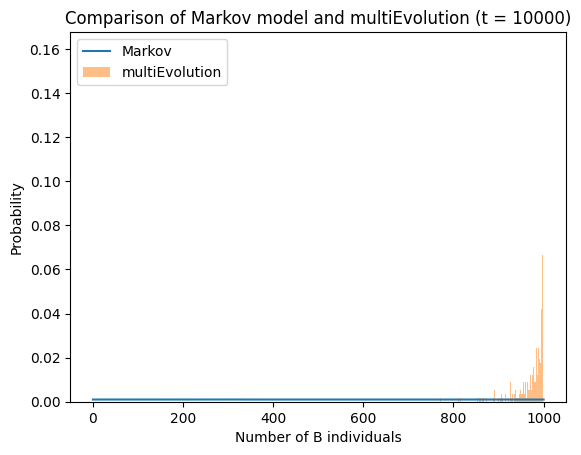

In [104]:
def final_distribution_markov(W, p0, num_generations):
    p = p0.copy()
    for _ in range(num_generations):
        p = np.dot(W, p)
    return p

def multiEvolution_distribution(model, initial_n, num_generations, num_copies):
    ns = np.full(num_copies, initial_n)
    for _ in range(num_generations):
        ns = np.array([model.next_generation(n) for n in ns])
    return ns

P = 1000
s = 0.01
u = v = 0.0001
num_generations_values = [1000, 10000]
num_copies = 1000

W = transition_matrix(P, s, u, v)
p0 = np.zeros(P+1)
p0[0] = 1

for num_generations in num_generations_values:
    # Markov model
    p_final_markov = final_distribution_markov(W, p0, num_generations)
    plt.plot(p_final_markov, label='Markov')

    # multiEvolution
    model = FisherWright(P, s, u, v)
    final_ns = multiEvolution_distribution(model, 0, num_generations, num_copies)
    plt.hist(final_ns, bins=np.arange(P+1)-0.5, density=True, alpha=0.5, label='multiEvolution')

    plt.xlabel('Number of B individuals')
    plt.ylabel('Probability')
    plt.title(f'Comparison of Markov model and multiEvolution (t = {num_generations})')
    plt.legend()
    plt.show()


## Task 4: Computing the Fixed Point Distribution

The distribution eventually reaches a fixed point, $\mathbf{p}(\infty)$, for any starting distribution (under mild conditions such as non-zero mutation rates).  We can get a very good approximation by running the Markov analysis long enough (or running a simulation for long enough).  Note that although we call it a fixed-point or equilibrium the number of individuals of type $B$ will continuously fluctuate over time.  The relative fluctuation will be smaller in a larger population (i.e. $n(t)/P$ will closer to its expected value $\mathbb{E}[n(t)]/P = p(\infty,n)$.

We have an exact solution to the dynamics in terms of the Markov model, but it involves a $(P+1)\times(P+1)$ transition matrix which gets difficult to work with when $P$ becomes large.  We can simulate a population which is much more practical for large $P$, but we need to run many simulations if we want to compute the average dynamics or a distribution.  Instead we can use the diffusion model which provides a very good approximation for large populations.

In the diffusion model we set up a stochastic differential equation describing the evolution.  Let $X(t)$ be a random variable describing the proportion of individuals with trait $B$ in the population at time $t$.  In the diffusion approximation we approximate the dynamics by a *stochastic differential equation*
$$ \mathrm{d} X(t) = a(X(t))\, \mathrm{d} t + b(X(t)) \, \mathrm{d} W(t) $$
where $a(X(t))$ describes the expected change in $X(t)$ in a short time $\mathrm{d} t$.  That is,
$$ a(X(t))\,\mathrm{d}t = \mathbb{E}\left[ \strut X(t+\mathrm{d}t) - X(t) \right] = (p_{sm}(X(t)) - X(t))\,\mathrm{d}t  $$
and $b(X(t))$ describes the fluctuation around this mean. That is,
$$ b^2(X(t))\,\mathrm{d} t = \mathbb{E}\left[ \strut \left(X(t+\mathrm{d}t) - X(t)\right)^2 \right] - \mathbb{E}\left[ \strut X(t+\mathrm{d}t) - X(t) \right]^2 = \frac{p_{sm}(X(t))\,(1-p_{sm}(X(t)))\,\mathrm{d}t}{P} $$
The quantity $W(t)$ is known as a Weiner variable it has the property that $W(t)-W(t')$ is normally distributed with mean 0 and variance $t-t'$.  The stochastic differential equation is a weird mathematical object.  But the distribution $f(t,x)$ describing the probability of $X(t)$ satisfies the Kolmogorov forward equation
$$ \frac{\partial f(t,x)}{\partial t} = - \frac{\partial\, a(x)\,f(t,x)}{\partial x} + \frac{1}{2} \frac{\partial^2 b^2(x)\, f(t,x)}{\partial x^2}.$$
This is still pretty horrible as partial differential equations are a slight pain to solve (but it can be done).  However, to find the fixed point distribution we look for a solution where
$$ \frac{\partial f(t,x)}{\partial t} = 0. $$
In this case we find
$$ f(\infty, x) \propto \frac{1}{b^2(x)} \exp\!\left( 2 \int_{1/2}^x \frac{a(y)}{b^2(y)} \mathrm{d} y \right). $$
This is relatively easy to compute, although it is a bit of a pain to do all the integrations.

**Question**

1. Write code to compute the steady state distribution and compare it to a Markov Chain model run for sufficiently long time

In [19]:
def steady_state_diffusion(N, s, m, n):
    """
    N = population size
    s = selective advantage
    m = prob of mutation (forward)
    n = prob of reverse mutation (going to non mutant)
    """
    x = 0 # initial number of mutants
    norm = get_norm(N, get_psm(s,m,n,x))
#     print(norm)
    ints=[]
    
    def integ(x):
        p_sm = get_psm(s,m,n,x)
        bs = p_sm*(1-p_sm)/N
        a = p_sm - x
        return -2*a/bs

    for num in range(N):
        x = num/N
        p_sm = get_psm(s,m,n,x)
        bs = p_sm*(1-p_sm)/N
        integral, _ = quad(integ,x,0.5)
        ints.append(np.exp(integral)/(norm*bs))

    return ints

def get_norm(N, p_sm):
    """do normalisation on integral for fokker planck"""
    x = 0
    norm=1
    
    def integ(x):
        p_sm = get_psm(s,m,n,x)
        bs = p_sm*(1-p_sm)/N
        a = p_sm - x
        return -2*a/bs
    
    def run_once(num):
        x = num/N
        p_sm = get_psm(s,m,n,x)
        bs = p_sm*(1-p_sm)/N
        integral, _ = quad(integ,x,0.5)
        return np.exp(integral)/(norm*bs)
    
    norm, _ = quad(run_once, 0, N)
    return norm
    
def get_psm(s, m, n, x):
    """Calculates p_sm"""
    ps = (1+s)*x/(1+s*x)
    return ps*(1-n) + m*(1-ps)



NameError: name 'distribution' is not defined

**Weak Selection and Mutation Approximation**

It gets even easier if we assume the mutation and selection rates are small (this is a good assumption in biology).  In this case
$$  f(\infty, x) \propto \frac{1}{N(P,s,u,v)} x^{2\,P\,u-1} \, (1-x)^{2\,P\,v-1} \, \mathrm{e}^{2\,P\,s\,x}.$$
where $N(P,s,u,v) = B(2\,P\,u, 2\,P\,v) \, {}_1F_1(2\,P\,u, 2\,P\,(u+v), 2\,P\,s\,x)$ where $B$ is the beta function and ${}_1F_1$ is a hypergeometric function. You can just normalise this by integrating (or summing) over the $x\in[0,1]$,

**Question**
1. Write a program to generate the distribution and compare to Markov model
2. Show that this is a poor approximation for strong selection of mutation rates.

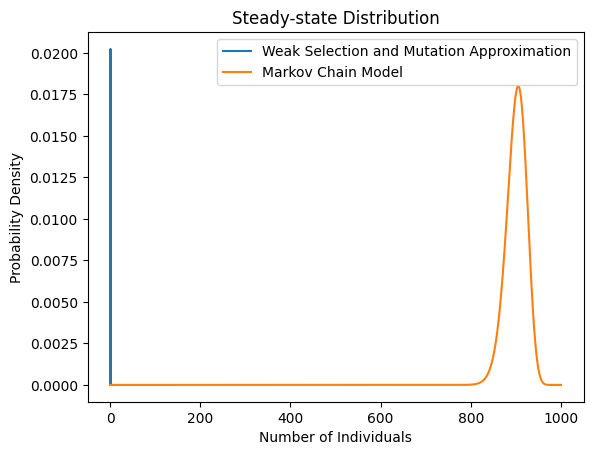

In [68]:
import numpy as np
from scipy.special import beta, hyp1f1

def steady_state_weak_approximation(P, s, u, v, num_points=1000):
    x_values = np.linspace(0, 1, num_points)
    N = N_func(P, s, u, v)
    density = (1 / N) * x_values**(2*P*u - 1) * (1 - x_values)**(2*P*v - 1) * np.exp(2*P*s*x_values)
    normalized_density = density / np.sum(density)

    return x_values, normalized_density

def N_func(P, s, u, v):
    x = 0.5  # Value in the hypergeometric function
    return beta(2*P*u, 2*P*v) * hyp1f1(2*P*u, 2*P*(u+v), 2*P*s*x)

# Parameters
P = 1000  # Population size
s = 0.1   # Selection strength
u = 0.01  # Mutation rate A -> B
v = 0.01  # Mutation rate B -> A

# Compute steady-state distribution using the weak selection and mutation approximation
x_values, density_weak_approximation = steady_state_weak_approximation(P, s, u, v)

# Compute steady-state distribution using the Markov Chain model (long simulation)
num_generations = 10000  # Number of generations for long simulation
p_t = np.zeros((num_generations, P+1))
p_t[0, 0] = 1  # Initial condition: p(0, 0) = 1

for t in range(1, num_generations):
    p_t[t] = np.dot(W, p_t[t-1])

density_markov = p_t[-1]  # Steady-state distribution

# Plot steady-state distributions
plt.plot(x_values, density_weak_approximation, label='Weak Selection and Mutation Approximation')
plt.plot(np.arange(P+1), density_markov, label='Markov Chain Model')
plt.xlabel('Number of Individuals')
plt.ylabel('Probability Density')
plt.title('Steady-state Distribution')
plt.legend()
plt.show()


## Task 5: Multigene Evolution

Up to now we have considered the evolution of a single trait in isolation from any other genes.  Obviously in real evolution the genome will contain many genes that code for different traits.  Here we want to show that if we have sufficient sexual recombination the Fisher-Wright model still provides a good approximation for the evolution.  Here we model the genome as a series of $L$ sites (each site represents a gene which will be on a different section of the DNA.  At each site we assume that the gene can be in one of two states.  The original state and the mutant state.  Again we assume that for two individuals that differ at one site the one the differs by having an extra mutation will be fitter by a factor $1+s$.  That is, the fitness (the relative number of offspring) will be proportional to $(1+s)^F$ where $F$ is the number of mutants in the string.  To simulate this consider a populations of $P$ binary strings of length $L$.  A 0 at a site denotes that gene is in the original state while a 1 represents the gene being in a mutant state.  Initially we assume all strings are in the original state (all zeros).  The evolution happens in generations according to
1. We consider $P$ mating events where two parents are selected with probability
$$p_i = \frac{(1+s)^{F_i}}{\sum_{j=1}^P (1+s)^{F_j}} $$
where $F_i$ is the number of ones in individual $i$
2. For each pair we generate a child by at each site choosing the gene value from one parent or the other uniformly at random
3. We then mutate each child by flipping the gene at each site with a probability of $u$ of flipping from 0 to 1 and a probability of $v$ of flipping from 1 to 0.  For simplicity we can assume $v=u$.

Below I provide a class that simulates selection, mutation and recombination

**Question**
1. Write a program to simulate sexual evolution of the population
    - Compare the mean number of mutant traits at each site with the Markov chain model
    - Compare the distribution of mutant traits across the differ sites with that for a Markov chain

In [69]:
import random
import numpy as np

class SexualEvolutionSimulation:
    def __init__(self, population_size, genome_length, mutation_rate):
        self.population_size = population_size
        self.genome_length = genome_length
        self.mutation_rate = mutation_rate
        self.population = [[0] * genome_length for _ in range(population_size)]
    
    def select_parents(self, fitness):
        total_fitness = sum(fitness)
        probabilities = [f / total_fitness for f in fitness]
        return random.choices(self.population, probabilities, k=2)
    
    def recombine(self, parent1, parent2):
        child = [random.choice(gene_pair) for gene_pair in zip(parent1, parent2)]
        return child
    
    def mutate(self, individual):
        mutated_individual = []
        for gene in individual:
            if gene == 0:
                mutated_gene = 1 if random.random() < self.mutation_rate else 0
            else:
                mutated_gene = 0 if random.random() < self.mutation_rate else 1
            mutated_individual.append(mutated_gene)
        return mutated_individual
    
    def simulate_generations(self, num_generations, selection_factor):
        mutant_counts = np.zeros(self.genome_length)
        
        for _ in range(num_generations):
            fitness = [(1 + selection_factor) ** sum(individual) for individual in self.population]
            new_population = []
            
            for _ in range(self.population_size // 2):
                parent1, parent2 = self.select_parents(fitness)
                child = self.recombine(parent1, parent2)
                mutated_child = self.mutate(child)
                new_population.extend([child, mutated_child])
                mutant_counts += np.array(mutated_child)
            
            self.population = new_population
        
        mean_mutant_traits = mutant_counts / num_generations
        return mean_mutant_traits

# Example usage
population_size = 100
genome_length = 20
mutation_rate = 0.01
num_generations = 100
selection_factor = 0.1

simulation = SexualEvolutionSimulation(population_size, genome_length, mutation_rate)
mean_mutant_traits = simulation.simulate_generations(num_generations, selection_factor)
print("Mean number of mutant traits at each site:")
print(mean_mutant_traits)


Mean number of mutant traits at each site:
[13.44 29.17 22.9   7.38 19.02 25.78 14.86  7.78 22.24 35.39 39.64 22.14
 23.37 27.8  30.57 33.82 16.11 35.   26.46 12.93]


**Asexual Populations**

1. Write code to simulate the evolution of an asexual population (you have to replace recombine with selection)
    - Show that the asexual population is poorly approximated by the Fisher Wright model

In [70]:
import random
import numpy as np

class AsexualEvolutionSimulation:
    def __init__(self, population_size, genome_length, mutation_rate):
        self.population_size = population_size
        self.genome_length = genome_length
        self.mutation_rate = mutation_rate
        self.population = [[0] * genome_length for _ in range(population_size)]
    
    def select_parents(self, fitness):
        total_fitness = sum(fitness)
        probabilities = [f / total_fitness for f in fitness]
        return random.choices(self.population, probabilities, k=2)
    
    def mutate(self, individual):
        mutated_individual = []
        for gene in individual:
            if random.random() < self.mutation_rate:
                mutated_gene = 1 - gene  # flip the gene value
            else:
                mutated_gene = gene
            mutated_individual.append(mutated_gene)
        return mutated_individual
    
    def simulate_generations(self, num_generations, selection_factor):
        mutant_counts = np.zeros(self.genome_length)
        
        for _ in range(num_generations):
            fitness = [(1 + selection_factor) ** sum(individual) for individual in self.population]
            new_population = []
            
            for _ in range(self.population_size):
                parent = self.select_parents(fitness)[0]  # select only one parent
                child = self.mutate(parent)
                new_population.append(child)
                mutant_counts += np.array(child)
            
            self.population = new_population
        
        mean_mutant_traits = mutant_counts / num_generations
        return mean_mutant_traits

# Example usage
population_size = 100
genome_length = 20
mutation_rate = 0.01
num_generations = 100
selection_factor = 0.1

simulation = AsexualEvolutionSimulation(population_size, genome_length, mutation_rate)
mean_mutant_traits = simulation.simulate_generations(num_generations, selection_factor)
print("Mean number of mutant traits at each site:")
print(mean_mutant_traits)


Mean number of mutant traits at each site:
[21.72 12.13 70.68 63.78 72.23 47.61 57.01 33.69 46.17 68.73 23.62 55.39
 72.88 53.51 62.34 56.04 38.28 64.14 72.33 43.17]


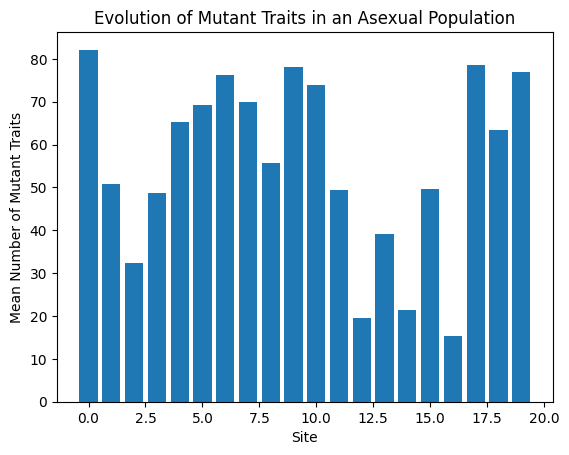

In [71]:
import random
import numpy as np
import matplotlib.pyplot as plt

class AsexualEvolutionSimulation:
    def __init__(self, population_size, genome_length, mutation_rate):
        self.population_size = population_size
        self.genome_length = genome_length
        self.mutation_rate = mutation_rate
        self.population = [[0] * genome_length for _ in range(population_size)]
    
    def select_parents(self, fitness):
        total_fitness = sum(fitness)
        probabilities = [f / total_fitness for f in fitness]
        return random.choices(self.population, probabilities, k=2)
    
    def mutate(self, individual):
        mutated_individual = []
        for gene in individual:
            if random.random() < self.mutation_rate:
                mutated_gene = 1 - gene  # flip the gene value
            else:
                mutated_gene = gene
            mutated_individual.append(mutated_gene)
        return mutated_individual
    
    def simulate_generations(self, num_generations, selection_factor):
        mutant_counts = np.zeros(self.genome_length)
        
        for _ in range(num_generations):
            fitness = [(1 + selection_factor) ** sum(individual) for individual in self.population]
            new_population = []
            
            for _ in range(self.population_size):
                parent = self.select_parents(fitness)[0]  # select only one parent
                child = self.mutate(parent)
                new_population.append(child)
                mutant_counts += np.array(child)
            
            self.population = new_population
        
        mean_mutant_traits = mutant_counts / num_generations
        return mean_mutant_traits

# Example usage
population_size = 100
genome_length = 20
mutation_rate = 0.01
num_generations = 100
selection_factor = 0.1

simulation = AsexualEvolutionSimulation(population_size, genome_length, mutation_rate)
mean_mutant_traits = simulation.simulate_generations(num_generations, selection_factor)

# Plotting
x = np.arange(genome_length)
plt.bar(x, mean_mutant_traits)
plt.xlabel("Site")
plt.ylabel("Mean Number of Mutant Traits")
plt.title("Evolution of Mutant Traits in an Asexual Population")
plt.show()
